# implement linear least square method and nonlinear least square method

1. 只完成多项式拟合
2. 使用sympy参考<https://blog.csdn.net/cj151525/article/details/95756847>
3. 最小二乘法的核心思想：
   1. 目标是已知结果和输入数据时，求待定系数。
   2. 定义距离为多变量的平方和。
   3. 目标函数是期望距离最小化。
   4. 求得所有的待定系数。
4. 基本思想：
   1. 泰勒展开。
   2. 注意这里是没有添加约束条件的。添加约束条件的需要使用拉格朗日插值法。

## 1. 线性最小二乘法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# 用于计算导数、偏导数。
import sympy

In [2]:
# 生成随机的是二维平面数据。
UpperLimit = 20
LowerLimit = -20
SamplesNumber = 5

samples = [[random.randint(LowerLimit, UpperLimit) for j in range(1, 3)] for i in range(0, SamplesNumber)]
samples_pd = pd.DataFrame(samples, columns=['x', 'y'])
samples_pd

,x,y
0,-17,-15
1,-9,9
2,5,17
3,8,-1
4,6,1


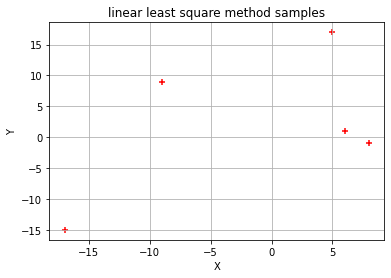

In [3]:
# display data
plt.title("linear least square method samples")
plt.xlabel('X')
plt.ylabel('Y')

for index, row in samples_pd.iterrows():
    plt.scatter(row['x'], row['y'], marker='+', color='red')
# plt.savefig("../../pictures/LinearLeastSquareMethodSamples.jpg")
plt.grid()
plt.show()

In [4]:
# 添加一列为y_hat。最后的时候没有使用这一列。
samples_pd['y_hat'] = None

# 添加一列为线性损失函数列。
samples_pd['LinearLoss'] = None
# 添加一列为非线性损失函数列。
samples_pd['NonlinearLoss'] = None
samples_pd

,x,y,y_hat,LinearLoss,NonlinearLoss
0,-17,-15,None,None,None
1,-9,9,None,None,None
2,5,17,None,None,None
3,8,-1,None,None,None
4,6,1,None,None,None


In [5]:
# 使用sympy来定义目标函数，也就是损失函数。
a = sympy.Symbol('a')
b = sympy.Symbol('b')
x = sympy.Symbol('x')
y_linear = sympy.Symbol('yh')
y_linear_hat = a*x + b
# 最终定义的损失函数。
loss_linear = (y_linear_hat - y_linear)**2
# y_=sympy.diff(y,x)
print(y_linear_hat)
print(loss_linear)

a*x + b
(a*x + b - yh)**2


In [6]:
# 测试对定义的函数赋值。
# x=sympy.Symbol('x')
fx = a*x + b
# 使用evalf函数传值
# 注意，当变量被赋值为0之后，显示出来的公式该变量依然在，但实际上不在了。
y1 = fx.evalf(subs={x:0, a:2})
print(y1)

a*x + b


In [7]:
# 定义应用到每一个样本点上的损失函数。
def getLinearLoss(sample):
    loss = (a * sample['x'] + b - sample['y'])**2
    return loss

samples_pd['LinearLoss'] = samples_pd.apply(getLinearLoss, axis=1)
samples_pd

,x,y,y_hat,LinearLoss,NonlinearLoss
0,-17,-15,None,(-17*a + b + 15)**2,None
1,-9,9,None,(-9*a + b - 9)**2,None
2,5,17,None,(5*a + b - 17)**2,None
3,8,-1,None,(8*a + b + 1)**2,None
4,6,1,None,(6*a + b - 1)**2,None


In [8]:
# 所有样本损失之和。
linear_loss_sum = samples_pd['LinearLoss'].sum() 
linear_loss_sum

(-17*a + b + 15)**2 + (-9*a + b - 9)**2 + (5*a + b - 17)**2 + (6*a + b - 1)**2 + (8*a + b + 1)**2

In [9]:
# 对不同的变量求偏导数
e_a = sympy.diff(linear_loss_sum, a)
e_b = sympy.diff(linear_loss_sum, b)
print(e_a)
print(e_b)

990*a - 14*b - 514
-14*a + 10*b - 22


In [10]:
# 对偏导方程组e_a和e_b求齐次解。
output = sympy.solve([e_a, e_b], [a, b])
print(output)

{a: 681/1213, b: 3622/1213}


In [11]:
# 查看结果是什么类型的。
print(type(output))
# 转换为浮点型输出。
testValue = float(output[a])
print(testValue)

<class 'dict'>
0.5614179719703215


<Figure size 576x360 with 0 Axes>

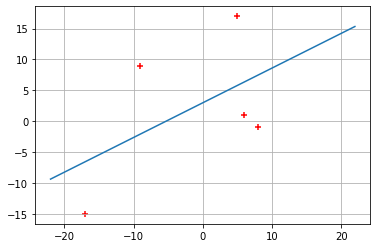

In [12]:
# 可视化
plt.figure(num=3, figsize=(8, 5))   # figsize的设置长和宽
# 从LowerLimit - 2到UpperLimit + 2中取20个数
x_s = np.linspace(LowerLimit - 2, UpperLimit + 2, 20)
# print(x)
y1 = float(output[a])*x_s+float(output[b])
# y2 = x_s**2
plt.figure()
plt.plot(x_s, y1)
for index, row in samples_pd.iterrows():
    plt.scatter(row['x'], row['y'], marker='+', color='red')

plt.grid()
plt.savefig("../../pictures/LinearLeastSquareMethodResult.jpg")
plt.show()

## 2. 非线性最小二乘法

In [16]:
a = sympy.Symbol('a')
b = sympy.Symbol('b')
c = sympy.Symbol('c')
d = sympy.Symbol('d')
x = sympy.Symbol('x')
y_nonlinear = sympy.Symbol('yh')
y_nonlinear_hat = a*x**3 + b*x**2 + c*x + d

# 最终定义的损失函数。
loss_nonlinear = (y_nonlinear - y_nonlinear_hat)**2

print(y_nonlinear_hat)
print(loss_nonlinear)

a*x**3 + b*x**2 + c*x + d
(-a*x**3 - b*x**2 - c*x - d + yh)**2


In [17]:
# 定义应用到每一个样本点上的损失函数。
def getNonlinearLoss(sample):
    loss = (a*sample['x']**3 + b*sample['x']**2 + c*sample['x'] + d - sample['y'])**2
    return loss

samples_pd['NonlinearLoss'] = samples_pd.apply(getNonlinearLoss, axis=1)
# samples_pd

# 所有样本损失之和。
nonlinear_loss_sum = samples_pd['NonlinearLoss'].sum() 
print(nonlinear_loss_sum)

(-4913*a + 289*b - 17*c + d + 15)**2 + (-729*a + 81*b - 9*c + d - 9)**2 + (125*a + 25*b + 5*c + d - 17)**2 + (216*a + 36*b + 6*c + d - 1)**2 + (512*a + 64*b + 8*c + d + 1)**2


In [18]:
# 对不同的变量求偏导数
e_a = sympy.diff(nonlinear_loss_sum, a)
e_b = sympy.diff(nonlinear_loss_sum, b)
e_c = sympy.diff(nonlinear_loss_sum, c)
e_d = sympy.diff(nonlinear_loss_sum, d)
print(e_a)
print(e_b)
print(e_c)
print(e_d)
# 对偏导方程组e_a和e_b求齐次解。
nonlinear_output = sympy.solve([e_a, e_b, e_c, e_d], [a, b, c, d])
print(nonlinear_output)

49986870*a - 2870474*b + 192198*c - 9578*d - 137926
-2870474*a + 192198*b - 9578*c + 990*d + 6418
192198*a - 9578*b + 990*c - 14*d - 514
-9578*a + 990*b - 14*c + 10*d - 22
{a: -231249559/33546296235, b: -3057029708/11182098745, c: -15981769127/33546296235, d: 49191624707/2236419749}


<Figure size 576x360 with 0 Axes>

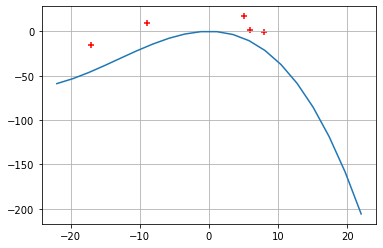

In [19]:
# 可视化
plt.figure(num=3, figsize=(8, 5))   # figsize的设置长和宽
# 从LowerLimit - 2到UpperLimit + 2中取20个数
x_s = np.linspace(LowerLimit - 2, UpperLimit + 2, 20)
# print(x)
y_nonlinear = float(nonlinear_output[a])*x_s**3 + float(nonlinear_output[b])*x_s**2 
+ float(nonlinear_output[c])*x_s + float(nonlinear_output[d])
# y2 = x_s**2
plt.figure()
plt.plot(x_s, y_nonlinear)
for index, row in samples_pd.iterrows():
    plt.scatter(row['x'], row['y'], marker='+', color='red')

plt.grid()
plt.savefig("../../pictures/NonlinearLeastSquareMethodResult.jpg")
plt.show()